In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
df_airline.dropna(axis=0,inplace=True)

In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df_airline.set_index('Month',inplace=True)

In [12]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

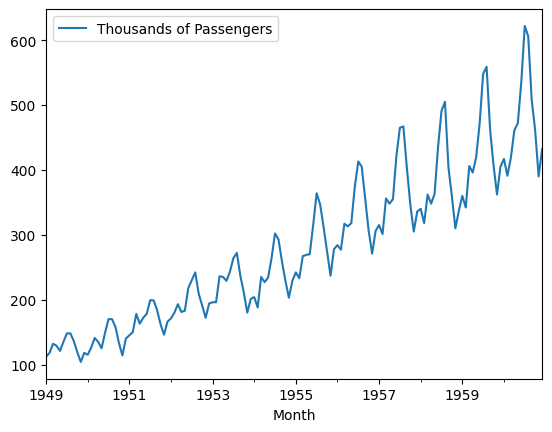

In [13]:
df_airline.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060498
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [17]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [18]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [19]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700047
p- value: 0.05421329028382478
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [21]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468513
p- value: 2.7328918500142026e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

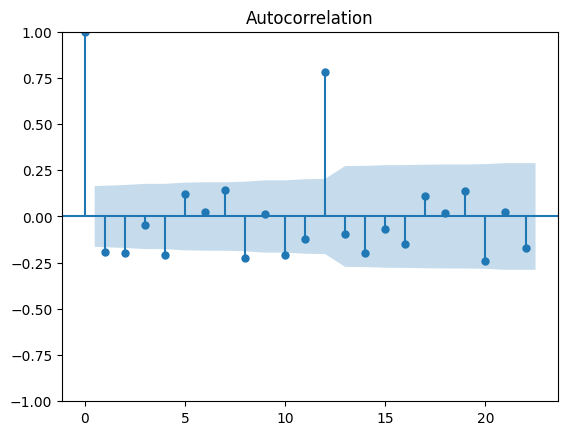

In [23]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

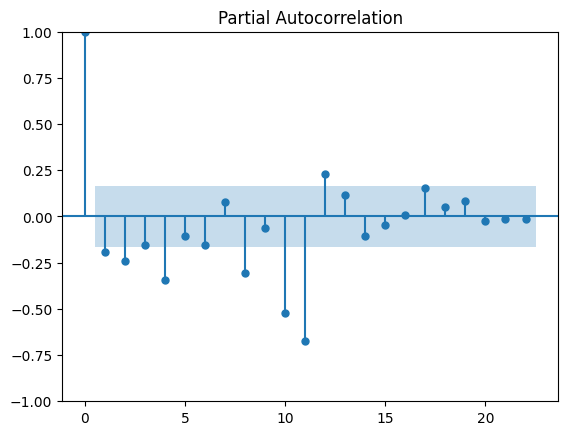

In [24]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

In [25]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
...,...,...,...
1960-08-01,606.0,-16.0,-103.0
1960-09-01,508.0,-98.0,-82.0
1960-10-01,461.0,-47.0,51.0


In [26]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [27]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [28]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [29]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1956-01-01,284.0,6.0,-35.0
1956-02-01,277.0,-7.0,-13.0
1956-03-01,317.0,40.0,47.0
1956-04-01,313.0,-4.0,-44.0
1956-05-01,318.0,5.0,9.0
1956-06-01,374.0,56.0,51.0
1956-07-01,413.0,39.0,-17.0
1956-08-01,405.0,-8.0,-47.0
1956-09-01,355.0,-50.0,-42.0


In [30]:
from statsmodels.tsa.arima.model import ARIMA


In [31]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
...,...,...,...
1955-08-01,347.0,-17.0,-66.0
1955-09-01,312.0,-35.0,-18.0
1955-10-01,274.0,-38.0,-3.0


In [32]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order=(4, 2, 2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [33]:
model_Arima_fit=model_ARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(4, 2, 2)   Log Likelihood                -361.940
Date:                     Tue, 28 May 2024   AIC                            737.880
Time:                             09:38:56   BIC                            754.727
Sample:                         01-01-1949   HQIC                           744.644
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2114      0.472      0.448      0.654      -0.713       1.136
ar.L2         -0.2498      0.201     -1.244      0.214      -0.644       0.144
ar.L3         -0.0704      0.135     -0.521      0.602      -0.335       0.194
ar.L4         -0.2986      0.109     -2.727      0.006      -0.513      -0.084
ma.L1         -0.9873      0.559     -1.765      0.078      -2.084       0.109
ma.L2         -0.0085      0.529     -0.016      0.987      -1.046       1.029
sigma2       373.0877    229.907      1.623      0.105     -77.522     823.698
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.25
Prob(Q):                              0.93   Prob(JB):                         0.12
Heteroskedasticity (H):               3.70   Skew:                             0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
test_data.head(10)

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1956-01-01,284.0,6.0,-35.0
1956-02-01,277.0,-7.0,-13.0
1956-03-01,317.0,40.0,47.0
1956-04-01,313.0,-4.0,-44.0
1956-05-01,318.0,5.0,9.0
1956-06-01,374.0,56.0,51.0
1956-07-01,413.0,39.0,-17.0
1956-08-01,405.0,-8.0,-47.0
1956-09-01,355.0,-50.0,-42.0


In [36]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [37]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [38]:
residuals

Month
1956-01-01    -28.481361
1956-02-01    -49.679460
1956-03-01    -15.431157
1956-04-01     -5.633370
1956-05-01     11.813933
1956-06-01     68.441715
1956-07-01    102.010648
1956-08-01     84.509156
1956-09-01     26.895517
1956-10-01    -24.346818
1956-11-01    -58.829747
1956-12-01    -22.988560
1957-01-01    -14.709767
1957-02-01    -31.640166
1957-03-01     19.505971
1957-04-01      8.021899
1957-05-01     12.468630
1957-06-01     77.744365
1957-07-01    119.212551
1957-08-01    119.338430
1957-09-01     54.007619
1957-10-01     -5.595297
1957-11-01    -50.175034
1957-12-01    -21.547558
1958-01-01    -19.726561
1958-02-01    -43.836800
1958-03-01     -2.002344
1958-04-01    -18.272244
1958-05-01     -5.613010
1958-06-01     64.040670
1958-07-01    117.734734
1958-08-01    129.474868
1958-09-01     26.236204
1958-10-01    -21.010670
1958-11-01    -72.279875
1958-12-01    -47.566998
1959-01-01    -26.858083
1959-02-01    -47.141507
1959-03-01     14.585606
1959-04-01      2.3

In [39]:
pred

1956-01-01    312.481361
1956-02-01    326.679460
1956-03-01    332.431157
1956-04-01    318.633370
1956-05-01    306.186067
1956-06-01    305.558285
1956-07-01    310.989352
1956-08-01    320.490844
1956-09-01    328.104483
1956-10-01    330.346818
1956-11-01    329.829747
1956-12-01    328.988560
1957-01-01    329.709767
1957-02-01    332.640166
1957-03-01    336.494029
1957-04-01    339.978101
1957-05-01    342.531370
1957-06-01    344.255635
1957-07-01    345.787449
1957-08-01    347.661570
1957-09-01    349.992381
1957-10-01    352.595297
1957-11-01    355.175034
1957-12-01    357.547558
1958-01-01    359.726561
1958-02-01    361.836800
1958-03-01    364.002344
1958-04-01    366.272244
1958-05-01    368.613010
1958-06-01    370.959330
1958-07-01    373.265266
1958-08-01    375.525132
1958-09-01    377.763796
1958-10-01    380.010670
1958-11-01    382.279875
1958-12-01    384.566998
1959-01-01    386.858083
1959-02-01    389.141507
1959-03-01    391.414394
1959-04-01    393.681337


<Axes: ylabel='Density'>

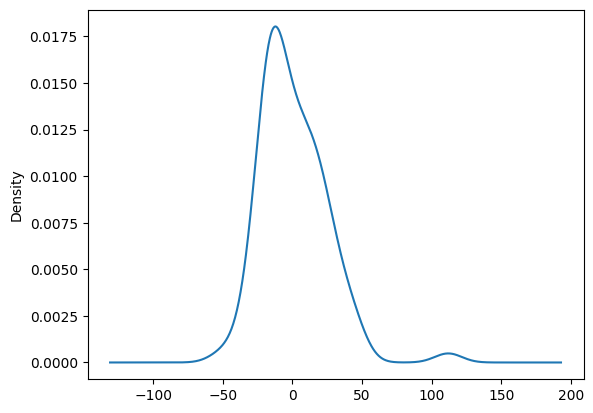

In [40]:
model_Arima_fit.resid.plot(kind='kde')

In [41]:
test_data['Predicted_ARIMA']=pred

<ipython-input-41-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

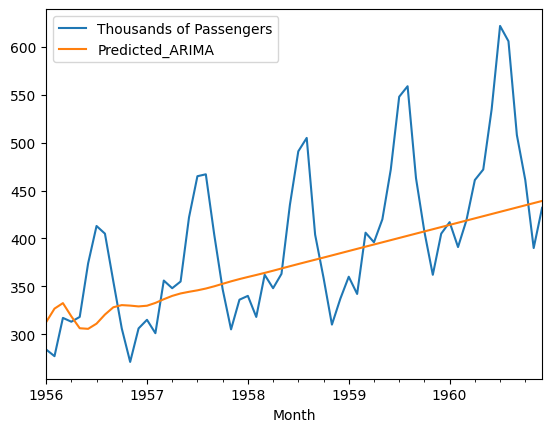

In [42]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

In [43]:
### 12 months
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [44]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


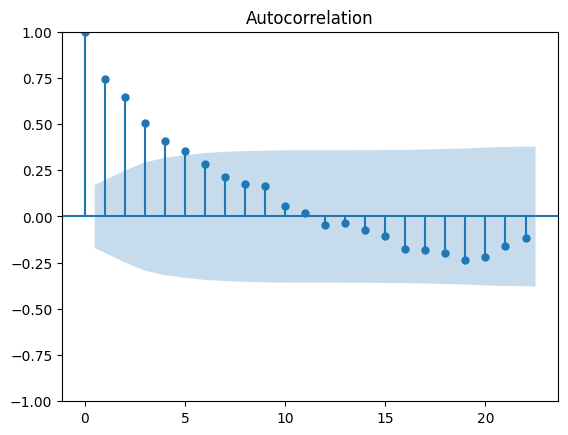

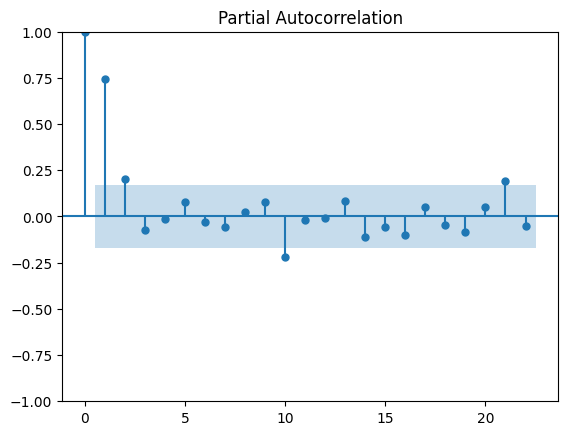

In [45]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [46]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [47]:
#model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(2,0,5),seasonal_order=(0,1,0,12))
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],seasonal_order=(2,1,5,12))
#model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(4,2,2),seasonal_order=(2,1,5,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [48]:
model_SARIMA_fit=model_SARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Predicted_ARIMA
Month,,,,
1960-08-01,606.0,-16.0,-103.0,430.069489
1960-09-01,508.0,-98.0,-82.0,432.343995
1960-10-01,461.0,-47.0,51.0,434.618631
1960-11-01,390.0,-71.0,-24.0,436.893247
1960-12-01,432.0,42.0,113.0,439.167757


In [50]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [51]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: xlabel='Month'>

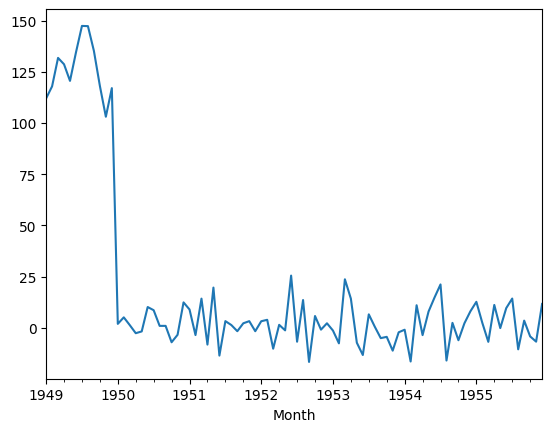

In [52]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

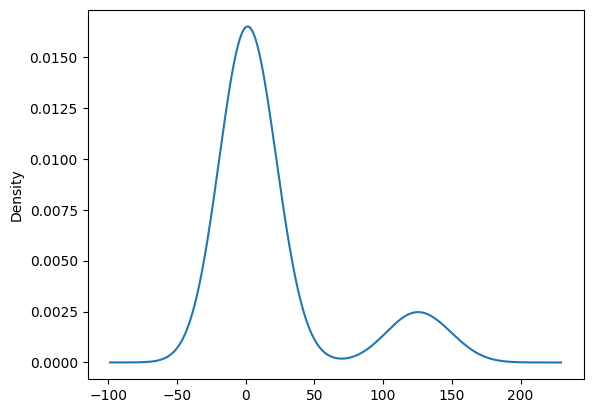

In [53]:
model_SARIMA_fit.resid.plot(kind='kde')

In [54]:
test_data['Predicted_SARIMA']=pred_Sarima

<ipython-input-54-5be0f969ecf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [55]:
test_data.tail(10)

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,
1960-03-01,419.0,28.0,54.0,418.697311,400.763197
1960-04-01,461.0,42.0,14.0,420.972390,404.569348
1960-05-01,472.0,11.0,-31.0,423.246961,408.612682
1960-06-01,535.0,63.0,52.0,425.521132,455.768654
1960-07-01,622.0,87.0,24.0,427.795222,517.625257
1960-08-01,606.0,-16.0,-103.0,430.069489,486.493795
1960-09-01,508.0,-98.0,-82.0,432.343995,441.350134
1960-10-01,461.0,-47.0,51.0,434.618631,394.883381
1960-11-01,390.0,-71.0,-24.0,436.893247,348.083356


<Axes: xlabel='Month'>

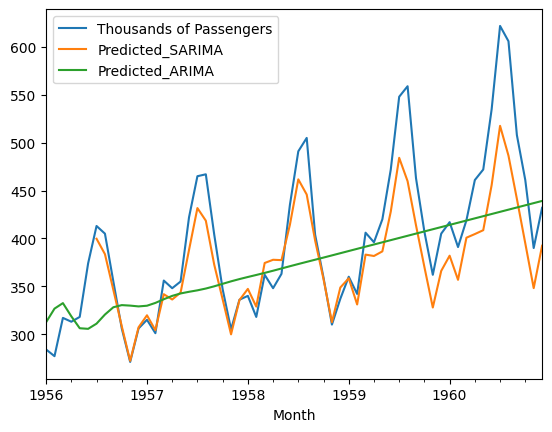

In [56]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()